Five tasks with our test data:
1. filter rejects only
2. for each row: first test or retest? (boolean)
3. Which retest in a row (int)?
4. Stat: pass/fail/reject percentages by station
5. Stat: Link two datasets, calculate:
  - avg test cost 
  - #of tests per facility
  - total test cost (# of tests per facility X price)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm

In [2]:
data = pd.read_csv('test_data_clean_uak211.csv')

In [3]:
data.shape

(1645722, 10)

In [4]:
data.head()

,Unnamed: 0,date,station_id,test_type,test_result,vin,model_year,vehicle_type,vehicle_class,gross_vehicle_weight_rating
0,1,01/01/2017,456.0,OBDII,Pass,5N1AN08W97C530793,2007.0,Truck,LDT1,5400.0
1,2,01/01/2017,1115.0,OBDII,Pass,WBANB53537CP05224,2007.0,Passenger Car,LDV,5026.0
2,3,01/01/2017,1109.0,OBDII,Pass,JN8AZ28R49T111532,2009.0,Passenger Car,LDT1,3848.0
3,4,01/01/2017,1115.0,OBDII,Pass,1N6AA07C18N350248,2008.0,Truck,LDT1,7200.0
4,5,01/01/2017,1115.0,Idle,Fail,1J4GZ88S5PC113745,1993.0,Passenger Car,LDV,5500.0


## Task 1: filter the fail test; get the initial idea of the data (pass/fail/rej ratio & different types of tests)

In [5]:
fail_result = data.loc[data['test_result'] == 'Fail']
fail_result.shape

(66448, 10)

### 66448 out of 1645722, ~4.038%

In [6]:
test_result_all = data.groupby(['test_result'])['test_type'].count()
test_result_all

test_result
Fail        66423
Pass      1501919
Reject      77355
Name: test_type, dtype: int64

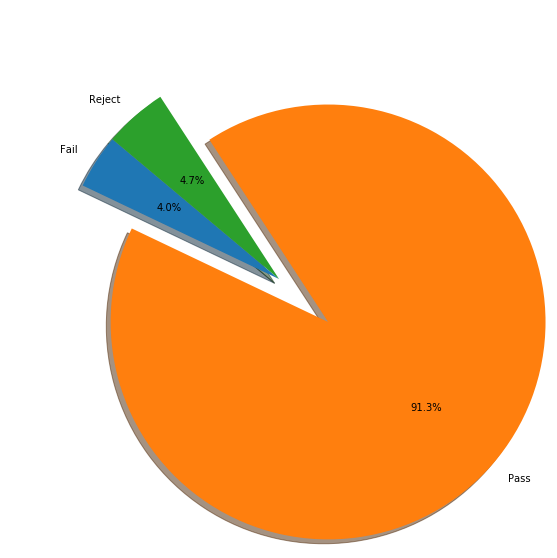

In [7]:
labels = ['Fail', 'Pass', 'Reject']
explode = (0, 0.3, 0)
plt.figure(figsize=(10,10))
plt.pie(test_result_all, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

Figure 1. Pie chart for all test result. Pass is the majority.

In [8]:
test_type_all = data.groupby(['test_type'])['test_type'].count()
test_type_all

test_type
Idle        137721
OBDII      1476628
Opacity      30767
Waiver         581
Name: test_type, dtype: int64

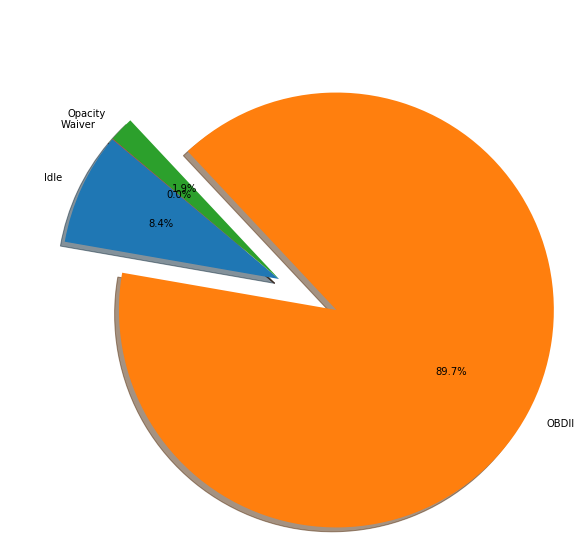

In [9]:
labels = ['Idle', 'OBDII', 'Opacity', 'Waiver']
explode = (0, 0.3, 0, 0)
plt.figure(figsize=(10,10))
plt.pie(test_type_all, explode=explode, labels=labels,autopct='%1.1f%%', shadow=True, startangle=140)
plt.show()

Figure 2. Pie chart for the test type group. OBDII count for 89.7% of total test

In [10]:
pd.DataFrame(data.groupby(['test_type', 'test_result'])['test_type'].count())

test_type
test_type test_result           
Idle      Fail             15671
          Pass            122034
          Reject              16
OBDII     Fail             49507
          Pass           1349782
          Reject           77339
Opacity   Fail              1234
          Pass             29533
Waiver    Fail                11
          Pass               570

## Task 2: for each row: first test or retest? (boolean)

In [11]:
# retest = pd.DataFrame()
# fail_index = list(fail_result.index)
# for i in tqdm(fail_index):
#     fail_vin = fail_result.loc[i]['vin']
#     data_sub = data.loc[i:,:][data['vin'] == fail_vin].reset_index(drop=True)
#     data_sub['isRetest'] = 0 
#     for j in range(1, len(data_sub)):
#         if data_sub.loc[j]['test_result'] == 'Pass':
#             data_sub.loc[j, 'isRetest'] = 1
#             break
#         else:
#             data_sub.loc[j, 'isRetest'] = 1
#             j+=1
#     data_sub = data_sub.loc[0:j,:]
#     retest = pd.concat([retest, data_sub], ignore_index=True)
        

In [12]:
# retest.to_csv('retest_result.csv')

## Task 3: Which retest in a row?

## Task 4: By station: pass/fail/reject percentage

In [13]:
station_stat = pd.DataFrame(data.groupby(['station_id','test_result'])['test_type'].count()).reset_index()
station_stat.head(10)

,station_id,test_result,test_type
0,1.0,Fail,883
1,1.0,Pass,1749
2,1.0,Reject,301
3,2.0,Fail,42
4,2.0,Pass,1838
5,2.0,Reject,81
6,11.0,Fail,23
7,11.0,Pass,746
8,11.0,Reject,28
9,24.0,Fail,68


In [14]:
station_stat = station_stat.pivot(index='station_id', columns='test_result')['test_type'].reset_index()
station_stat.index.names = ['index']
station_stat.head()

test_result,station_id,Fail,Pass,Reject
index,,,,
0,1.0,883.0,1749.0,301.0
1,2.0,42.0,1838.0,81.0
2,11.0,23.0,746.0,28.0
3,24.0,68.0,1514.0,53.0
4,28.0,66.0,1061.0,40.0


In [15]:
station_stat['Total'] = station_stat['Fail'] + station_stat['Pass'] + station_stat['Reject']

#calculate the ration of fail/pass/rej vs total
station_stat['Fail_ratio'] = station_stat['Fail'] / station_stat['Total']
station_stat['Pass_ratio'] = station_stat['Pass'] / station_stat['Total']
station_stat['Rej_ratio'] = station_stat['Reject'] / station_stat['Total']
station_stat.to_csv('station_stat_yc3420.csv')

station_stat.head()

test_result,station_id,Fail,Pass,Reject,Total,Fail_ratio,Pass_ratio,Rej_ratio
index,,,,,,,,
0,1.0,883.0,1749.0,301.0,2933.0,0.301057,0.596318,0.102625
1,2.0,42.0,1838.0,81.0,1961.0,0.021418,0.937277,0.041305
2,11.0,23.0,746.0,28.0,797.0,0.028858,0.936010,0.035132
3,24.0,68.0,1514.0,53.0,1635.0,0.041590,0.925994,0.032416
4,28.0,66.0,1061.0,40.0,1167.0,0.056555,0.909169,0.034276


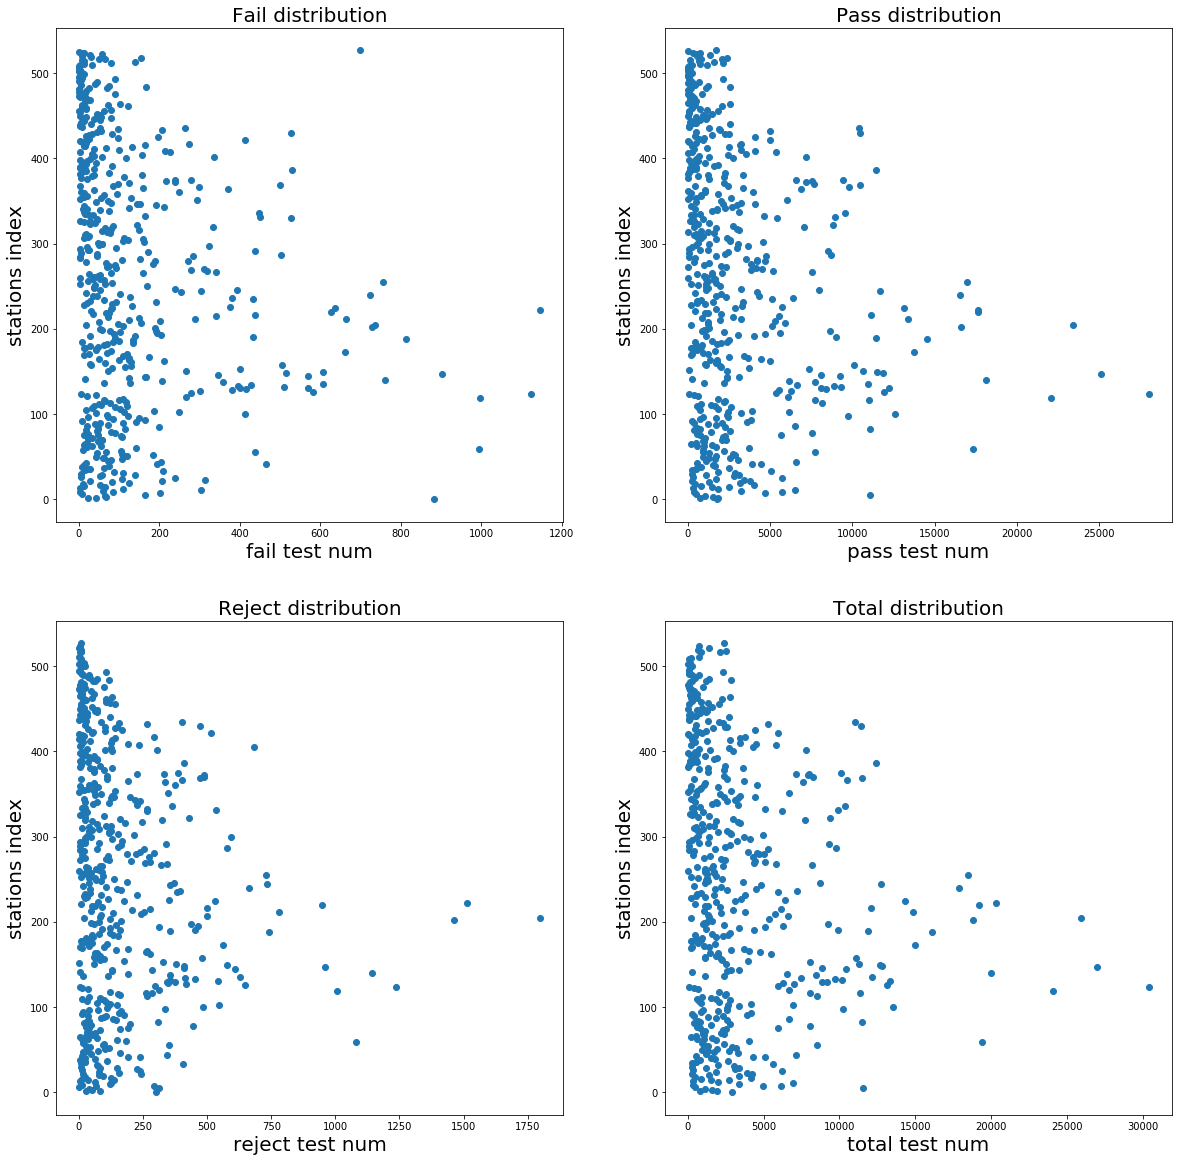

In [16]:
fig = plt.figure(figsize=(20,20))
ax1 = fig.add_subplot(221)
ax2 = fig.add_subplot(222)
ax3 = fig.add_subplot(223)
ax4 = fig.add_subplot(224)

index_ls = station_stat.reset_index().index

ax1.scatter(station_stat['Fail'],index_ls)
ax1.set_title('Fail distribution', size = 20)
ax1.set_ylabel('stations index', size=20)
ax1.set_xlabel('fail test num', size=20)

ax2.scatter(station_stat['Pass'], index_ls)
ax2.set_title('Pass distribution', size = 20)
ax2.set_ylabel('stations index', size=20)
ax2.set_xlabel('pass test num', size=20)

ax3.scatter(station_stat['Reject'], index_ls)
ax3.set_title('Reject distribution', size = 20)
ax3.set_ylabel('stations index', size=20)
ax3.set_xlabel('reject test num', size=20)

ax4.scatter(station_stat['Total'], index_ls)
ax4.set_title('Total distribution', size = 20)
ax4.set_ylabel('stations index', size=20)
ax4.set_xlabel('total test num', size=20)
#  ax1.


# = station_stat.reset_index().plot(x='index', y='Fail', style='o')
# plt.ylabel()
plt.show()

## Task 5: 
Stat: Link two datasets, calculate:
avg test cost
#of tests per facility
total test cost (# of tests per facility X price)

In [17]:
price = pd.read_csv('verified_avg_fee_by_station_jx.csv')
price.head()

,No.,Station Id,Avg. Test Fees,Station Name,Address,City,ZIP,Phone Number,Price,Tax,On the Spot Registration,Registration/Sticker Fee,Service Type,Detailed Information
0,1.0,2.0,$25,KEN GARFF MERCEDES BENZ,575 SOUTH STATE,SALT LAKE CITY,84111.0,855-780-1053,25,0,Na,Na,TestAndRepair,Na
1,2.0,24.0,$39,OLYMPUS HILLS SINCLAIR,3905 SOUTH WASATCH BLVD,SALT LAKE CITY,84124.0,801- 272-2081,39,0,Na,Na,TestAndRepair,Na
2,3.0,28.0,$31,UNION SERVICE,997 EAST 7220 SOUTH,MIDVALE,84047.0,801-255-4122,Na,Na,Na,Na,Na,Na
3,4.0,38.0,$30,LARRY H. MILLER TOYOTA,5650 S STATE ST,MURRAY,84107.0,801-264-3850,30,0,Yes,5,TestAndRepair,Na
4,5.0,46.0,$35,QUALITY TIRE CO.,1335 WEST 2100 SOUTH,SALT LAKE CITY,84119.0,801-972-1944,Na,Na,Na,Na,Na,Na


In [18]:
total = pd.merge(data, price, left_on = 'station_id', right_on = 'Station Id', how='right')
total.head()

,Unnamed: 0,date,station_id,test_type,test_result,vin,model_year,vehicle_type,vehicle_class,gross_vehicle_weight_rating,...,Address,City,ZIP,Phone Number,Price,Tax,On the Spot Registration,Registration/Sticker Fee,Service Type,Detailed Information
0,1.0,01/01/2017,456.0,OBDII,Pass,5N1AN08W97C530793,2007.0,Truck,LDT1,5400.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35,0,Yes,8,TestAndRepair,Na
1,1838.0,01/03/2017,456.0,OBDII,Pass,1J8FF28W88D530503,2008.0,Truck,LDT1,3575.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35,0,Yes,8,TestAndRepair,Na
2,2033.0,01/03/2017,456.0,OBDII,Pass,1Z7HT28K57S217557,2007.0,Truck,LDT1,5070.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35,0,Yes,8,TestAndRepair,Na
3,2160.0,01/03/2017,456.0,OBDII,Pass,1GNFK13007R222363,2007.0,Truck,LDT1,7300.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35,0,Yes,8,TestAndRepair,Na
4,2204.0,01/03/2017,456.0,OBDII,Pass,1G6KD54Y7WU729949,1998.0,Passenger Car,LDV,5161.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35,0,Yes,8,TestAndRepair,Na


In [19]:
total_cleaned = total.dropna(subset=['Price'])
total_cleaned['Price'] = total_cleaned['Price'].astype(str)
total_cleaned = total_cleaned[total_cleaned.Price != 'Na']
total_cleaned['Price'].isnull().values.any()

/Users/xiaoguihua/anaconda3/envs/new_env/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


False

### 1. get the average price and total cost for the whole period

In [20]:
total_cleaned['Price'] = total_cleaned['Price'].astype(str).astype(float)
total_cleaned['Price'].mean()

34.1432810629289

In [21]:
total_cleaned['Price'].sum()

45600229.74

In [22]:
total_cleaned.head()

,Unnamed: 0,date,station_id,test_type,test_result,vin,model_year,vehicle_type,vehicle_class,gross_vehicle_weight_rating,...,Address,City,ZIP,Phone Number,Price,Tax,On the Spot Registration,Registration/Sticker Fee,Service Type,Detailed Information
0,1.0,01/01/2017,456.0,OBDII,Pass,5N1AN08W97C530793,2007.0,Truck,LDT1,5400.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35.0,0,Yes,8,TestAndRepair,Na
1,1838.0,01/03/2017,456.0,OBDII,Pass,1J8FF28W88D530503,2008.0,Truck,LDT1,3575.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35.0,0,Yes,8,TestAndRepair,Na
2,2033.0,01/03/2017,456.0,OBDII,Pass,1Z7HT28K57S217557,2007.0,Truck,LDT1,5070.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35.0,0,Yes,8,TestAndRepair,Na
3,2160.0,01/03/2017,456.0,OBDII,Pass,1GNFK13007R222363,2007.0,Truck,LDT1,7300.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35.0,0,Yes,8,TestAndRepair,Na
4,2204.0,01/03/2017,456.0,OBDII,Pass,1G6KD54Y7WU729949,1998.0,Passenger Car,LDV,5161.0,...,8131 So. REDWOOD RD.,WEST JORDAN,84088.0,801- 568-2400,35.0,0,Yes,8,TestAndRepair,Na


### Price distribution for all records

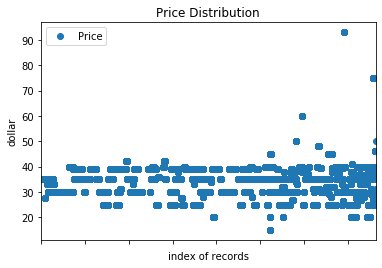

In [32]:
ax = total_cleaned.plot(y='Price', style='o', use_index=True)
ax.set_xticklabels([])
ax.set_xlabel('index of records')
ax.set_ylabel('dollar')
ax.set_title('Price Distribution')
plt.show()

## 34.14 is the average price for ALL the test data
## 45,600,229 is the total cost for ALL the test¶

## 2. get the count, total spend and other info for each station with test data

In [33]:
count = pd.DataFrame(total_cleaned.groupby('station_id')['test_result'].count()).reset_index()
count.head()

,station_id,test_result
0,2.0,1961
1,24.0,1635
2,38.0,11557
3,58.0,6121
4,64.0,3388


In [34]:
tot_spend = pd.DataFrame(total_cleaned.groupby('station_id')['Price'].sum()).reset_index()
tot_spend.head()

,station_id,Price
0,2.0,49025.0
1,24.0,63765.0
2,38.0,346710.0
3,58.0,153025.0
4,64.0,118580.0


In [35]:
station_test_price = pd.merge(count, tot_spend, on='station_id')
station_test_price = pd.merge(station_test_price, price, left_on='station_id', right_on = 'Station Id')

In [36]:
station_test_price = station_test_price.rename(columns= {'test_result':'test_num', 'Price_x':'test_cost_total'})
station_test_price.head()

,station_id,test_num,test_cost_total,No.,Station Id,Avg. Test Fees,Station Name,Address,City,ZIP,Phone Number,Price_y,Tax,On the Spot Registration,Registration/Sticker Fee,Service Type,Detailed Information
0,2.0,1961,49025.0,1.0,2.0,$25,KEN GARFF MERCEDES BENZ,575 SOUTH STATE,SALT LAKE CITY,84111.0,855-780-1053,25,0,Na,Na,TestAndRepair,Na
1,24.0,1635,63765.0,2.0,24.0,$39,OLYMPUS HILLS SINCLAIR,3905 SOUTH WASATCH BLVD,SALT LAKE CITY,84124.0,801- 272-2081,39,0,Na,Na,TestAndRepair,Na
2,38.0,11557,346710.0,4.0,38.0,$30,LARRY H. MILLER TOYOTA,5650 S STATE ST,MURRAY,84107.0,801-264-3850,30,0,Yes,5,TestAndRepair,Na
3,58.0,6121,153025.0,6.0,58.0,$25,RIVERTON CHEVROLET,11100 S JORDAN GTWY,SOUTH JORDAN,84095.0,801- 938-7683,25,0,No,Na,TestAndRepair,Na
4,64.0,3388,118580.0,7.0,64.0,$35,NEIL'S PRO SERVICE,1204 WEST 600 NORTH,SALT LAKE CITY,84116.0,385- 489-0499,35,0,No,Na,TestAndRepair,Na


In [37]:
station_test_price.to_csv('station_test_price_yc3420.csv')

### 3. total test num for each station

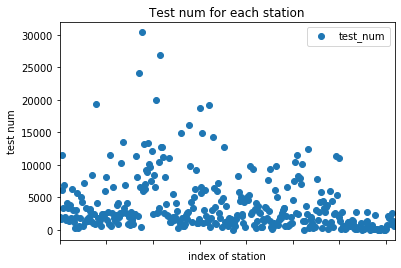

In [39]:
ax = station_test_price.plot(y='test_num', style='o', use_index=True)
ax.set_xticklabels([])
ax.set_xlabel('index of station')
ax.set_ylabel('test num')
ax.set_title('Test num for each station')
plt.show()